In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt 
import re 

import scipy.stats as stats  

%matplotlib inline 

sns.set(style = "ticks")

from dateutil.relativedelta import relativedelta
import statsmodels.formula.api as smf 
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv('bankloans data.csv')

In [3]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [4]:
df.tail()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
848,35,2,1,11,24,7.8,0.417456,1.454544,NaN
849,37,1,20,13,41,12.9,0.899130,4.389870,NaN


In [5]:
df.shape

(850, 9)

In [6]:
train_data = df[df['default'].isnull() == False]

In [7]:
train_data.shape

(700, 9)

In [8]:
test_data = df[df['default'].isnull() == True]

In [9]:
test_data.shape

(150, 9)

In [10]:
train_data.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [11]:
train_data.duplicated().sum()

0

In [12]:
test_data.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [13]:
test_data.duplicated().sum()

0

# ***Outlier Detection and Treatment Process***

In [14]:
train_data.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

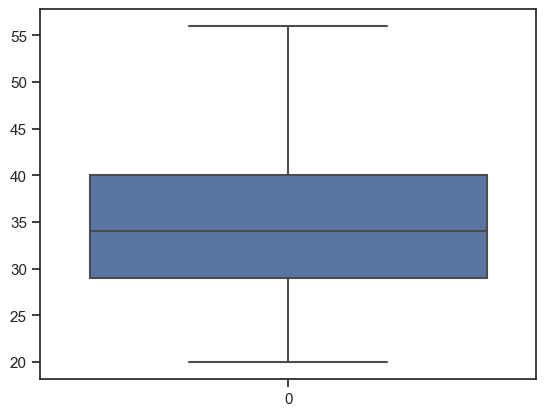

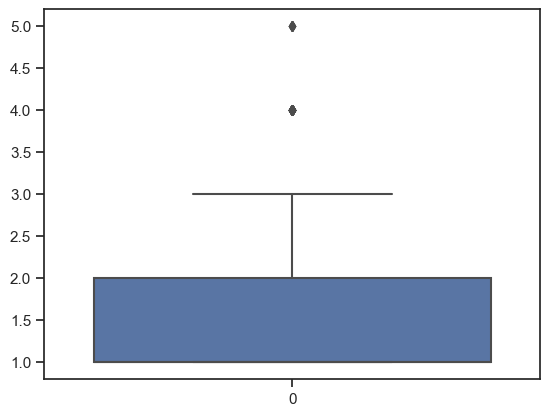

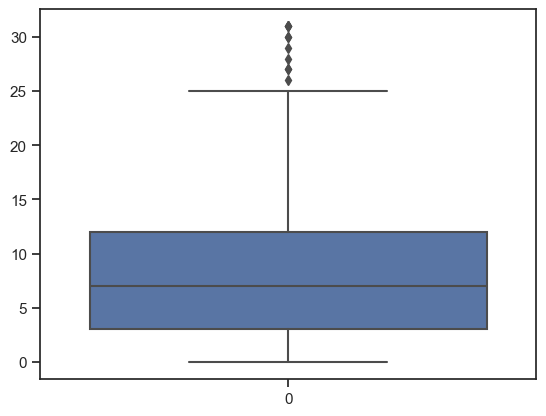

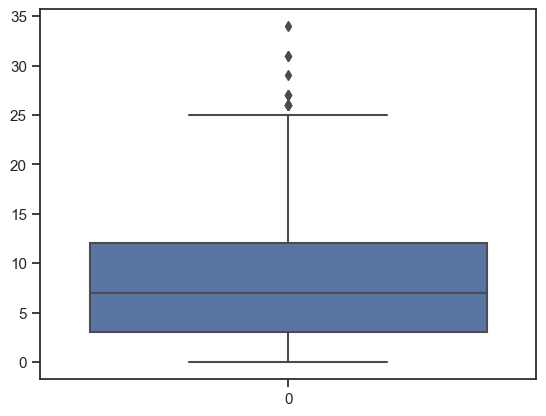

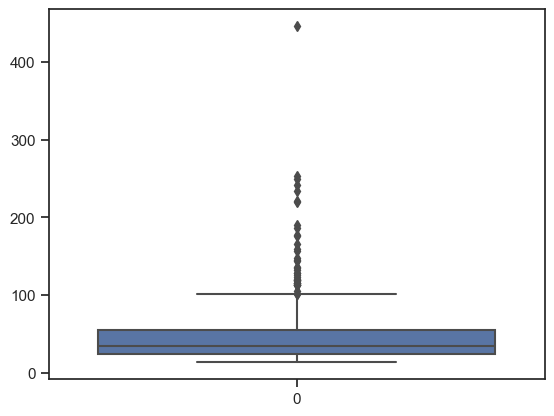

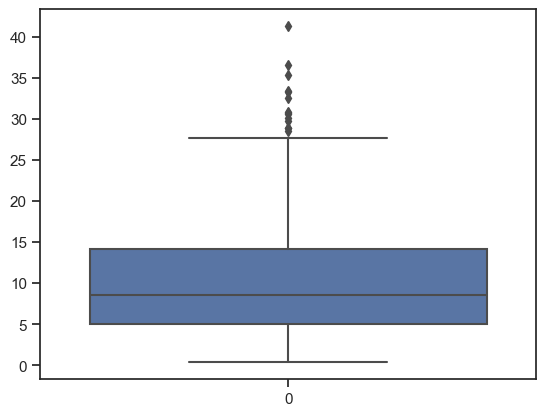

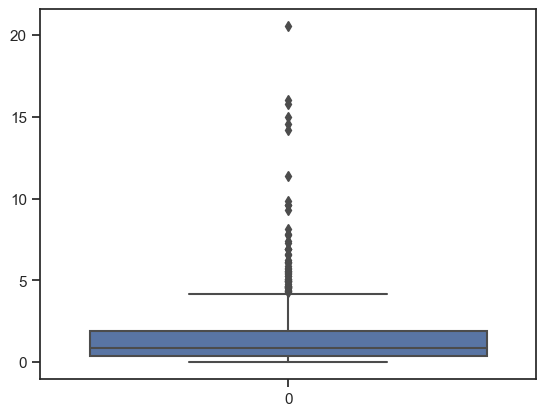

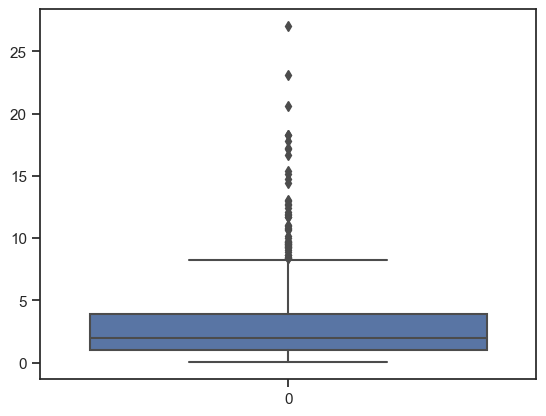

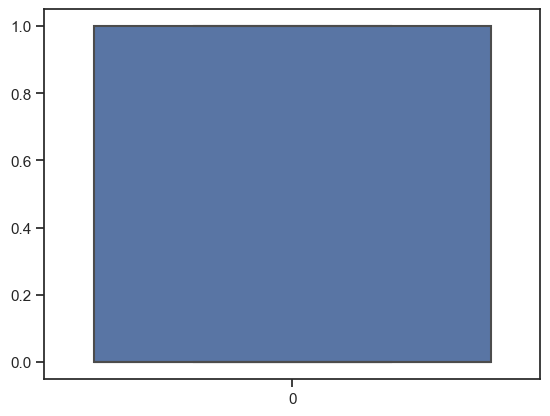

In [15]:
for i in train_data.columns:
    sns.boxplot(train_data[i])
    plt.show()

In [16]:
def outliertreat_IQR(d):
    m = d.quantile(0.5)
    q1 = d.quantile(0.25)
    q3 = d.quantile(0.75)
    q_1p = d.quantile(0.01)
    q_99p = d.quantile(0.99)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    return lc,uc

In [17]:
train_data.apply(outliertreat_IQR)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,12.5,-0.5,-10.5,-10.5,-22.5,-8.6875,-1.930284,-3.274152,-1.5
1,56.5,3.5,25.5,25.5,101.5,27.8125,4.201299,8.241395,2.5


In [18]:
train_data['ed'] = train_data['ed'].clip(lower = -0.5, upper = 3.5)
train_data['employ'] = train_data['employ'].clip(lower = -10.5, upper = 25.5)
train_data['address'] = train_data['address'].clip(lower = -10.5, upper = 25.5)
train_data['debtinc'] = train_data['debtinc'].clip(lower = -8.6875, upper = 27.8125)

C:\Users\VJahn\AppData\Local\Temp\ipykernel_19952\385044511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['ed'] = train_data['ed'].clip(lower = -0.5, upper = 3.5)
C:\Users\VJahn\AppData\Local\Temp\ipykernel_19952\385044511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['employ'] = train_data['employ'].clip(lower = -10.5, upper = 25.5)
C:\Users\VJahn\AppData\Local\Temp\ipykernel_19952\385044511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

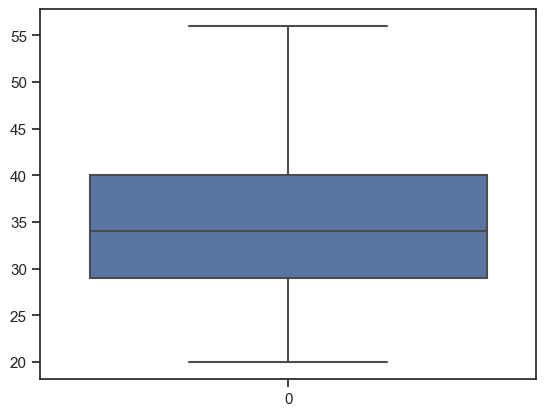

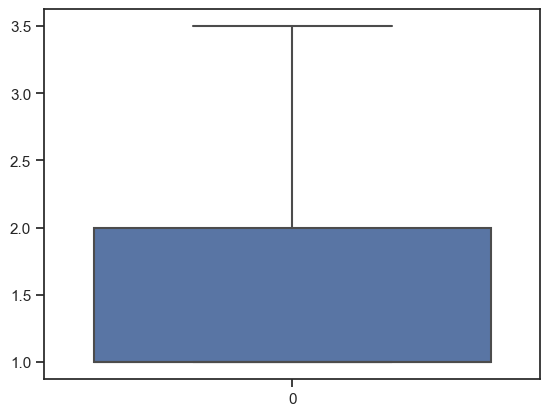

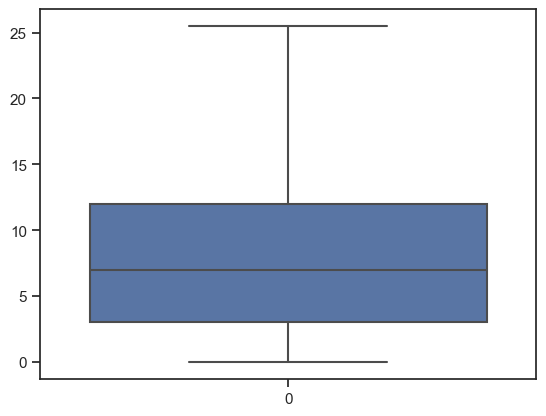

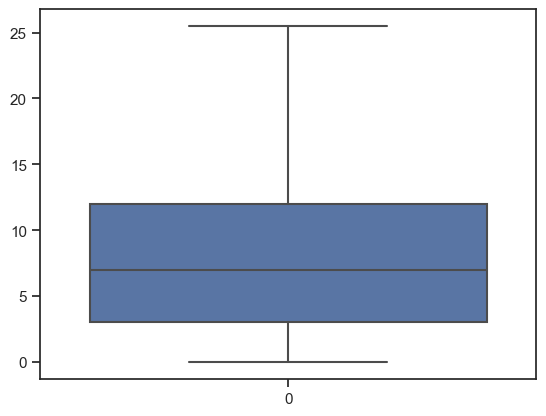

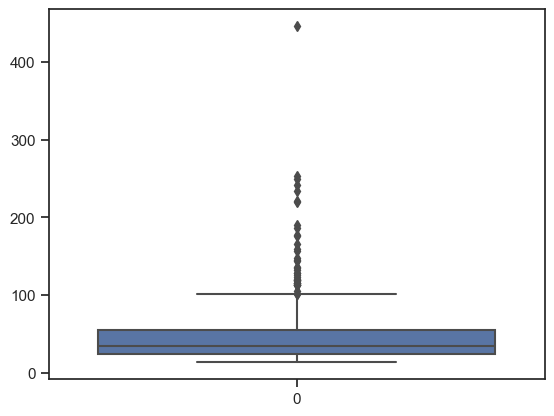

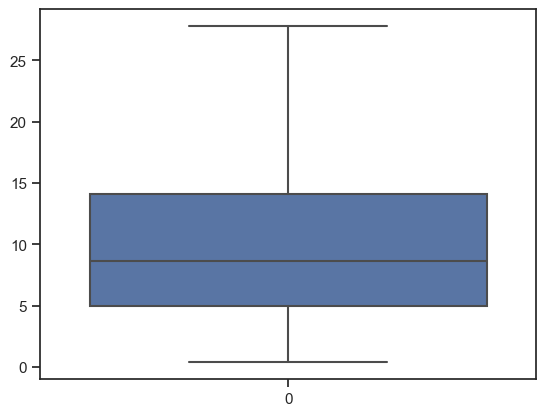

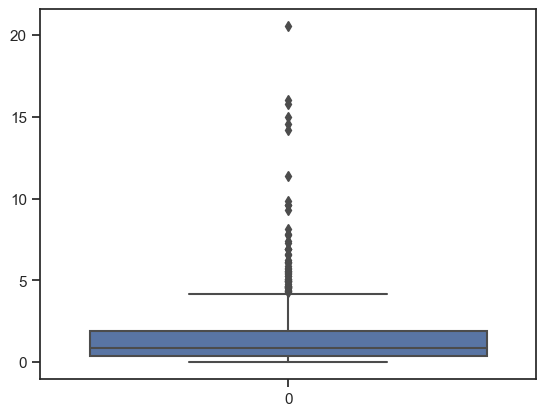

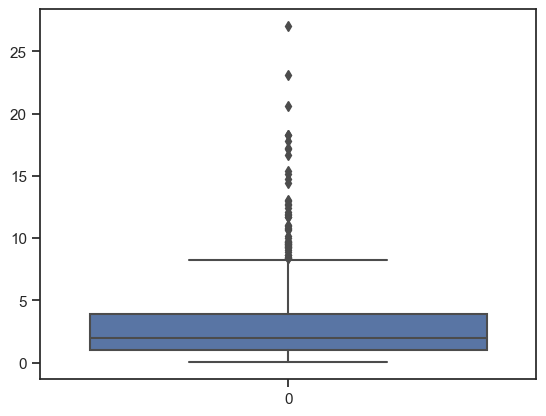

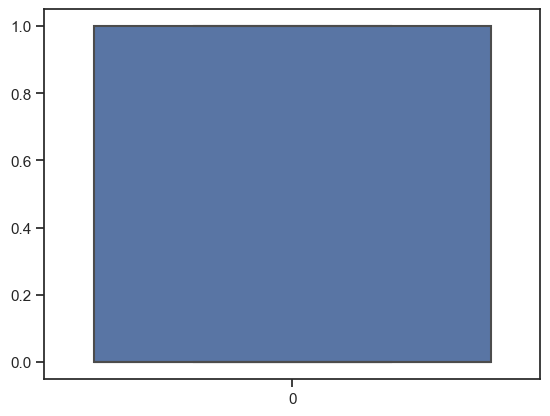

In [19]:
for i in train_data.columns:
    sns.boxplot(train_data[i])
    plt.show()

# ***Checking the Probability Distribution of the Variables***

In [20]:
train_data.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

C:\Users\VJahn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VJahn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VJahn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VJahn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

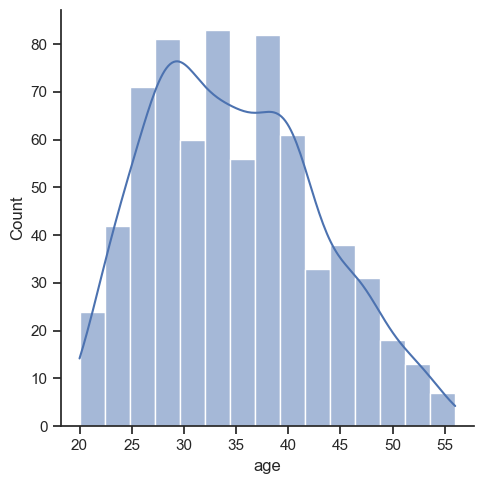

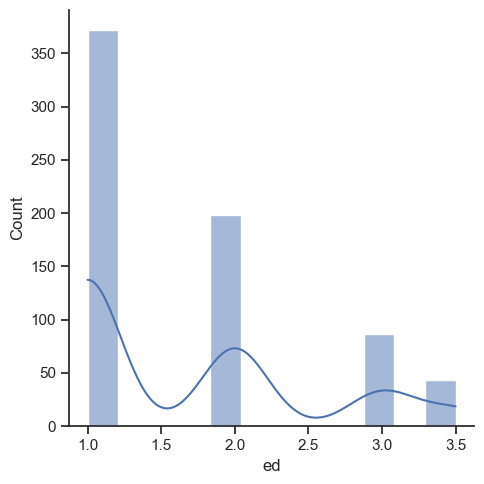

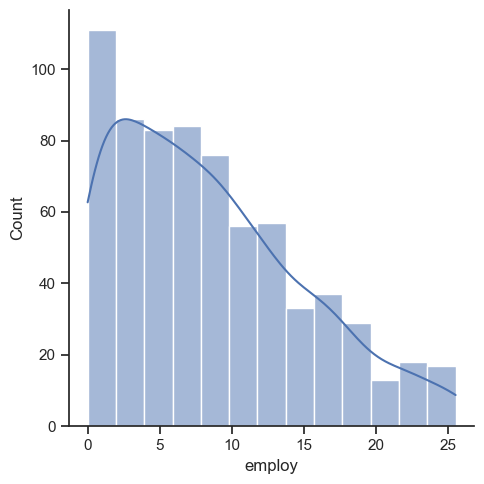

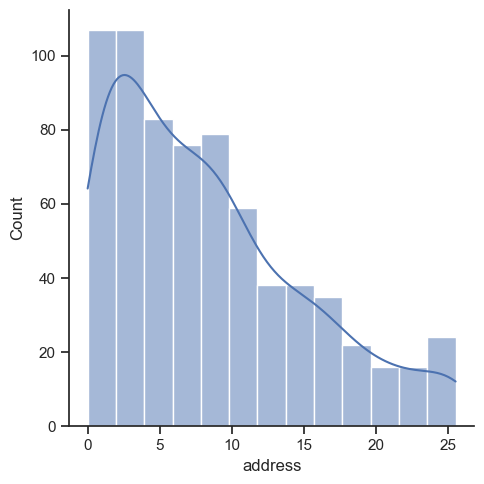

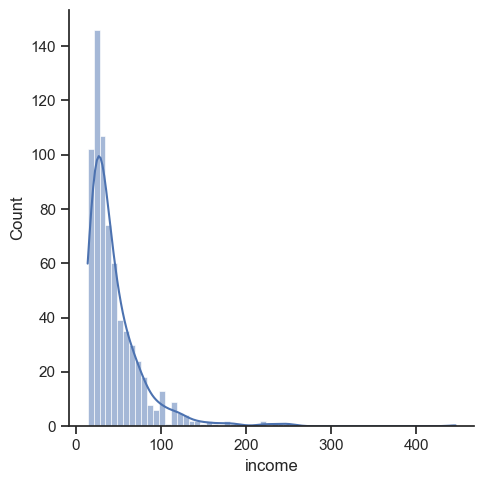

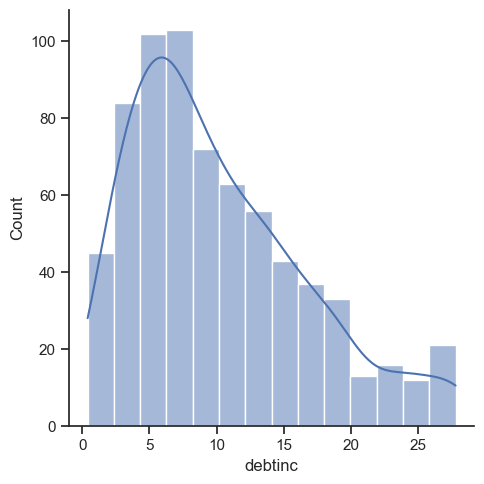

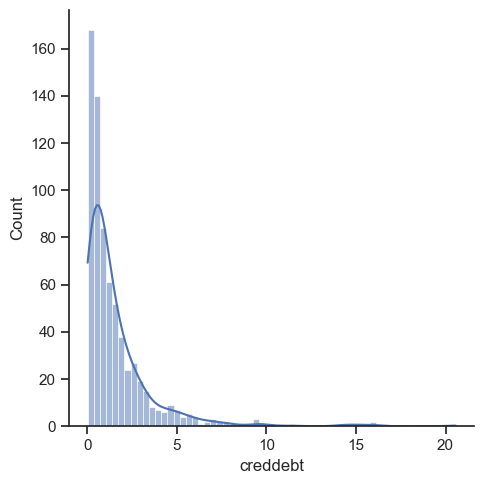

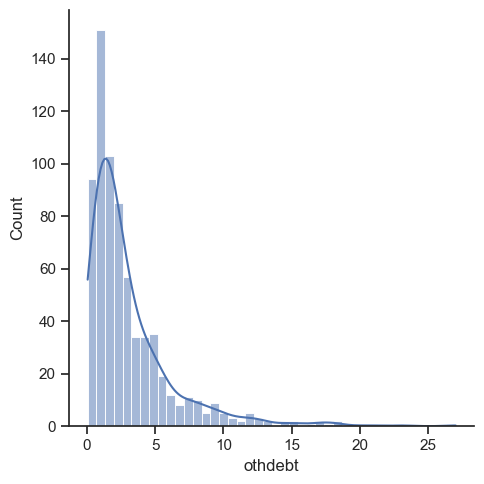

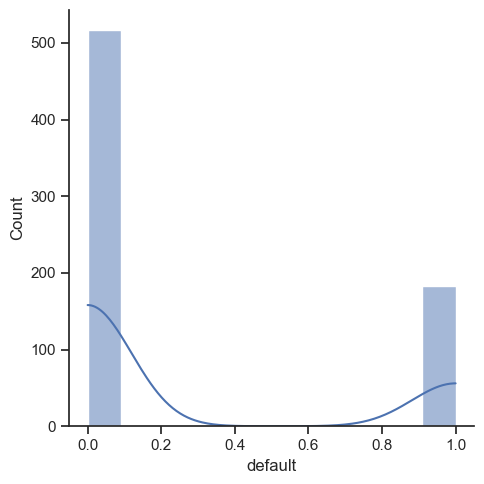

In [21]:
for i in train_data.columns:
    sns.displot(train_data[i], kde = True)

# ***Logorithemic Transformations***

C:\Users\VJahn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VJahn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VJahn\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\VJahn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VJahn\anaconda3\L

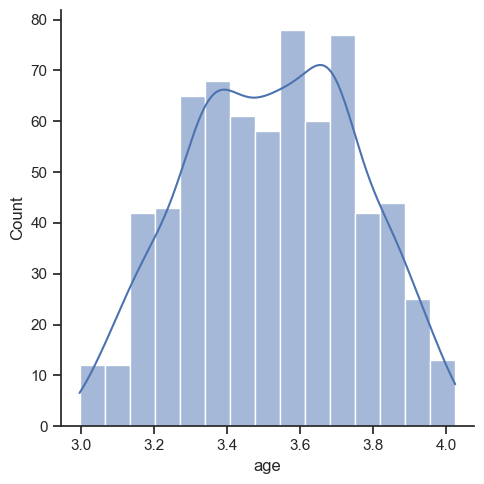

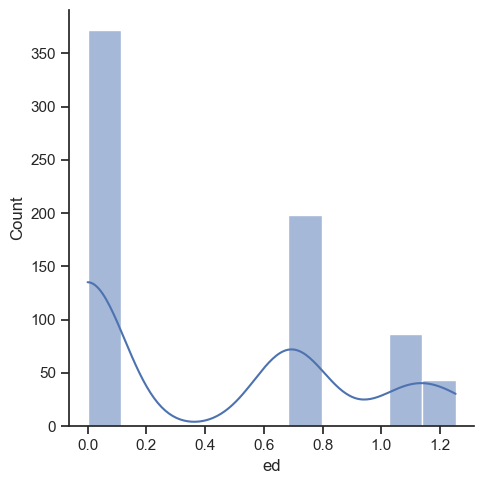

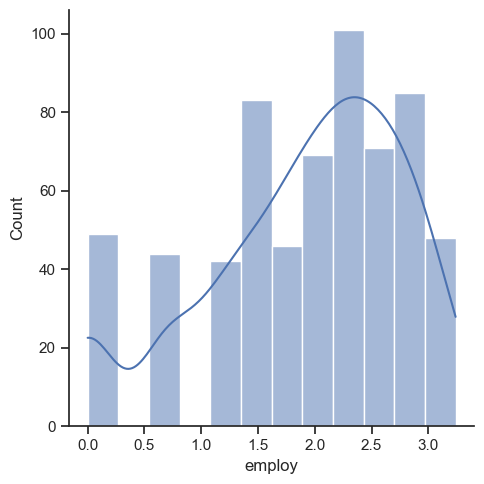

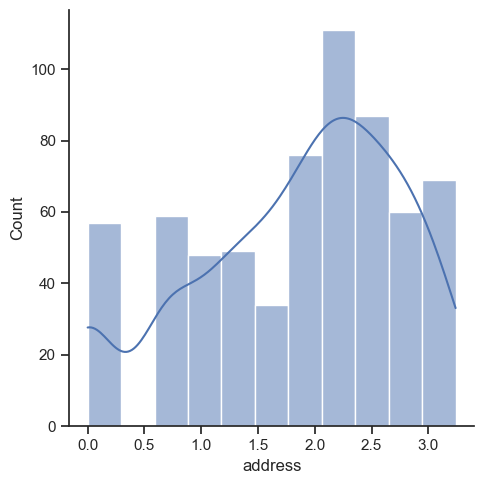

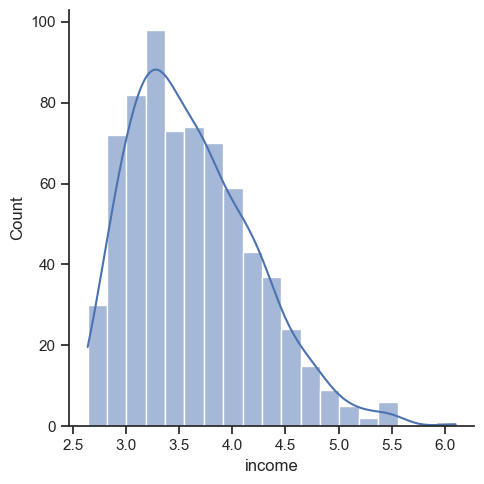

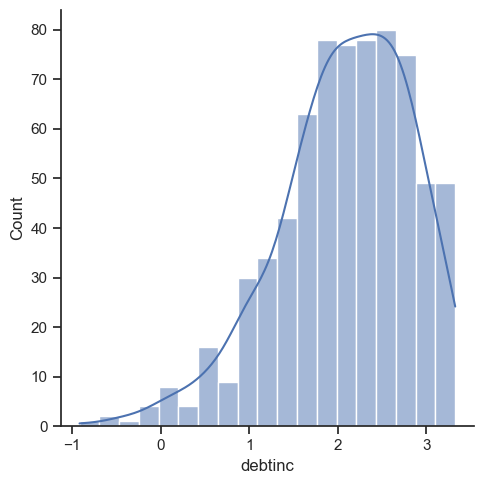

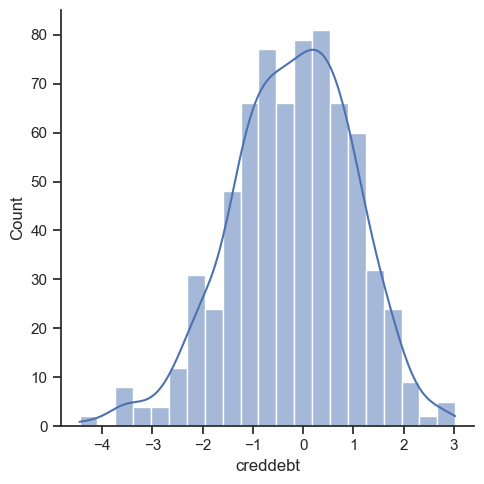

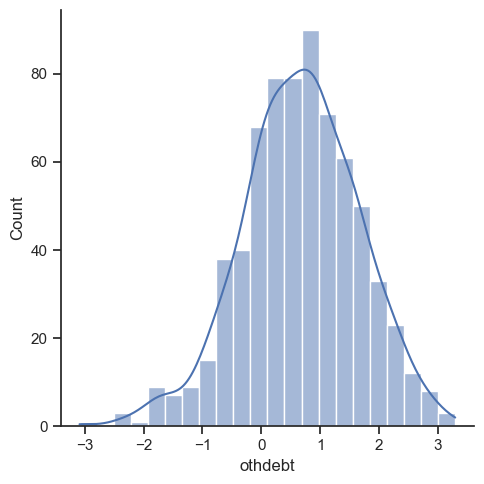

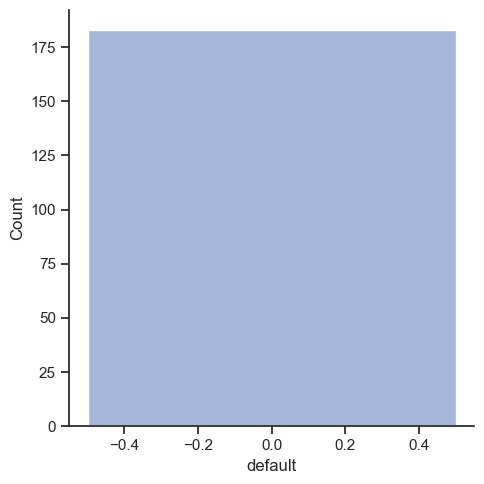

In [22]:
for i in train_data.columns:
    sns.displot(np.log(train_data[i]), kde = True)

In [23]:
train_copy = train_data.copy()

In [24]:
train_copy['log_age'] = np.log(train_copy['age'])

In [25]:
train_copy['log_ed'] = np.log(train_copy['ed'])

In [26]:
train_copy['log_income'] = np.log(train_copy['income'])

In [27]:
train_copy['log_debtinc'] = np.log(train_copy['debtinc'])

In [28]:
train_copy['log_creddebt'] = np.log(train_copy['creddebt'])

In [29]:
train_copy['log_othdebt'] = np.log(train_copy['othdebt'])

In [30]:
train_copy = train_copy.drop(columns = ['age', 'ed', 'income', 'debtinc', 'creddebt', 'othdebt'])

In [31]:
train_copy.head()

,employ,address,default,log_age,log_ed,log_income,log_debtinc,log_creddebt,log_othdebt
0,17.0,12.0,1.0,3.713572,1.098612,5.170484,2.230014,2.430045,1.611158
1,10.0,6.0,0.0,3.295837,0.000000,3.433987,2.850707,0.309103,1.386494
2,15.0,14.0,0.0,3.688879,0.000000,4.007333,1.704748,-0.155397,0.774232
3,15.0,14.0,0.0,3.713572,0.000000,4.787492,1.064711,0.977845,-0.196891
4,2.0,0.0,1.0,3.178054,0.693147,3.332205,2.850707,0.580782,1.117291


# **Building the Model using Logistic Regression**

In [32]:
train,test = train_test_split(train_copy , test_size = 0.3, random_state = 150)

In [33]:
train.shape

(490, 9)

In [34]:
test.shape

(210, 9)

In [35]:
train.columns

Index(['employ', 'address', 'default', 'log_age', 'log_ed', 'log_income',
       'log_debtinc', 'log_creddebt', 'log_othdebt'],
      dtype='object')

In [36]:
formula = 'default~address+log_age+log_ed+employ+log_income+log_debtinc+log_creddebt+log_othdebt' 

In [37]:
model1 = smf.logit(formula, data = train).fit()

Optimization terminated successfully.
         Current function value: 0.411813
         Iterations 7


In [38]:
print(model1.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  490
Model:                          Logit   Df Residuals:                      481
Method:                           MLE   Df Model:                            8
Date:                Fri, 15 Nov 2024   Pseudo R-squ.:                  0.2632
Time:                        15:51:54   Log-Likelihood:                -201.79
converged:                       True   LL-Null:                       -273.88
Covariance Type:            nonrobust   LLR p-value:                 3.185e-27
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -6.0320      6.856     -0.880      0.379     -19.470       7.406
address         -0.0837      0.026     -3.263      0.001      -0.134      -0.033
log_age          0.4403      0.707      0.62

In [39]:
# ****

In [40]:
pred_train = model1.predict(train)

In [41]:
check_train = pd.concat([train.default, pred_train], axis = 1)

In [42]:
check_train.head(3)

,default,0
401,0.0,0.034927
684,0.0,0.032006
482,0.0,0.274557


In [43]:
check_train = check_train.rename(columns = {0 : 'train_prediction'})

In [44]:
check_train.head(3)

,default,train_prediction
401,0.0,0.034927
684,0.0,0.032006
482,0.0,0.274557


In [45]:
# lets take cutoff = 0.3

In [46]:
check_train['pred_default'] = np.where(check_train.train_prediction >= 0.3, 1, 0)

In [47]:
check_train.head(3)

,default,train_prediction,pred_default
401,0.0,0.034927,0
684,0.0,0.032006,0
482,0.0,0.274557,0


In [48]:
check_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490 entries, 401 to 228
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   default           490 non-null    float64
 1   train_prediction  490 non-null    float64
 2   pred_default      490 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 13.4 KB


In [49]:
check_train['pred_default'] = check_train['pred_default'].astype('float')

In [50]:
check_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490 entries, 401 to 228
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   default           490 non-null    float64
 1   train_prediction  490 non-null    float64
 2   pred_default      490 non-null    float64
dtypes: float64(3)
memory usage: 15.3 KB


# **build a confusion matrix on train data**

In [51]:
pd.crosstab(index = check_train.default, columns = check_train.pred_default, margins = True)

pred_default,0.0,1.0,All
default,,,
0.0,295,74,369
1.0,33,88,121
All,328,162,490


In [52]:
print(metrics.classification_report(check_train.default, check_train.pred_default))

              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85       369
         1.0       0.54      0.73      0.62       121

    accuracy                           0.78       490
   macro avg       0.72      0.76      0.73       490
weighted avg       0.81      0.78      0.79       490



In [53]:
# ****

In [54]:
pred_test = model1.predict(test)

In [55]:
check_test = pd.concat([test.default, pred_test], axis = 1)

In [56]:
check_test.head(2)

,default,0
539,1.0,0.612229
628,0.0,0.603033


In [57]:
check_test = check_test.rename(columns = {0 : 'test_prediction'})

In [58]:
check_test.head(2)

,default,test_prediction
539,1.0,0.612229
628,0.0,0.603033


In [59]:
# lets take cutoff = 0.3

In [60]:
check_test['pred_default'] = np.where(check_test.test_prediction >= 0.3, 1, 0)

In [61]:
check_test.head(2)

,default,test_prediction,pred_default
539,1.0,0.612229,1
628,0.0,0.603033,1


In [62]:
check_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 539 to 469
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   default          210 non-null    float64
 1   test_prediction  210 non-null    float64
 2   pred_default     210 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 5.7 KB


In [63]:
check_test['pred_default'] = check_test['pred_default'].astype('float')

In [64]:
check_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 539 to 469
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   default          210 non-null    float64
 1   test_prediction  210 non-null    float64
 2   pred_default     210 non-null    float64
dtypes: float64(3)
memory usage: 6.6 KB


# **build a confusion matrix on test data**

In [65]:
pd.crosstab(index = check_test.default, columns = check_test.pred_default, margins = True)

pred_default,0.0,1.0,All
default,,,
0.0,114,34,148
1.0,21,41,62
All,135,75,210


In [66]:
print(metrics.classification_report(check_test.default, check_test.pred_default))

              precision    recall  f1-score   support

         0.0       0.84      0.77      0.81       148
         1.0       0.55      0.66      0.60        62

    accuracy                           0.74       210
   macro avg       0.70      0.72      0.70       210
weighted avg       0.76      0.74      0.74       210



In [67]:
#even after doing outlier treatment process and converting the variables to normal distribution :
#max training accuracy : 78%
#testing accuracy (before transformations : 78% , after transformations : 74%)